# Predict the housing prices for given data set

We're given dataset from [UCI MachineLearning Repository](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set) which contains total of 414 instances/rows with 7 attributes. 

## Load libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pandas import DataFrame, Series

%matplotlib inline

## Load dataset

In [2]:
data = pd.read_csv("Data.csv")
data.head()

,No,transaction_date,house_age,distance_to_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Check features of dataset

In [3]:
data.shape

(414, 8)

In [4]:
data.dtypes

No                                   int64
transaction_date                   float64
house_age                          float64
distance_to_nearest_MRT_station    float64
number_of_convenience_stores         int64
latitude                           float64
longitude                          float64
house_price                        float64
dtype: object

Skip "No" column as it is just a serial number of rows. 

In [5]:
data = data.drop(columns=['No'])
data.head()

,transaction_date,house_age,distance_to_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Check if missing values in dataset

In [6]:
data.isnull().sum()

transaction_date                   0
house_age                          0
distance_to_nearest_MRT_station    0
number_of_convenience_stores       0
latitude                           0
longitude                          0
house_price                        0
dtype: int64

No missing data

## EDA
Let's explore the data

### 1. Univariate analysis
Exploration of data column by column

#### A. Transaction Date 

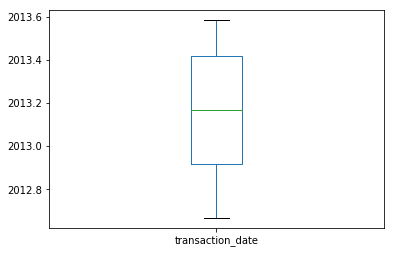

In [7]:
data['transaction_date'].plot.box()

#### 2. House Age (in years)

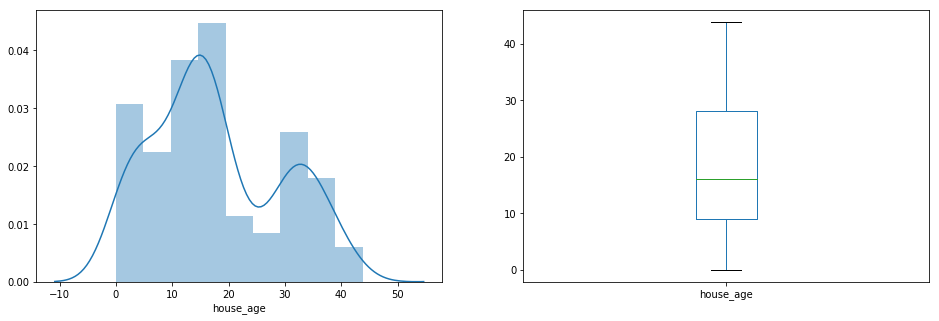

In [8]:
plt.figure(1)

plt.subplot(121)
sns.distplot(data['house_age'])
plt.subplot(122)
data['house_age'].plot.box(figsize=(16,5))

plt.show()

#### 3. Distance to nearest MRT station

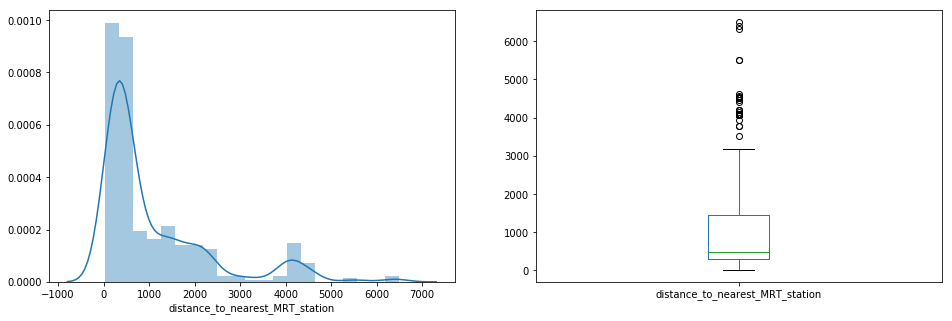

In [9]:
plt.figure(1)

plt.subplot(121)
sns.distplot(data['distance_to_nearest_MRT_station'])

plt.subplot(122)
data['distance_to_nearest_MRT_station'].plot.box(figsize=(16,5))

plt.show()

There are outliers in Distance to nearest MRT station column. 

#### 4. Number of convenience stores

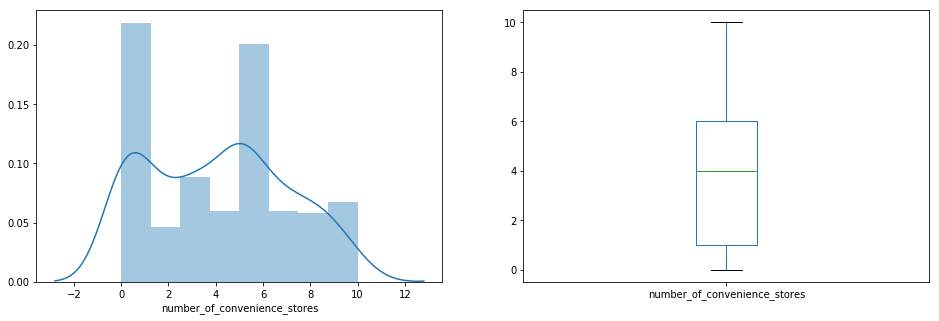

In [10]:
plt.figure(1)

plt.subplot(121)
sns.distplot(data['number_of_convenience_stores'])

plt.subplot(122)
data['number_of_convenience_stores'].plot.box(figsize=(16,5))

plt.show()

#### 5. Longitude

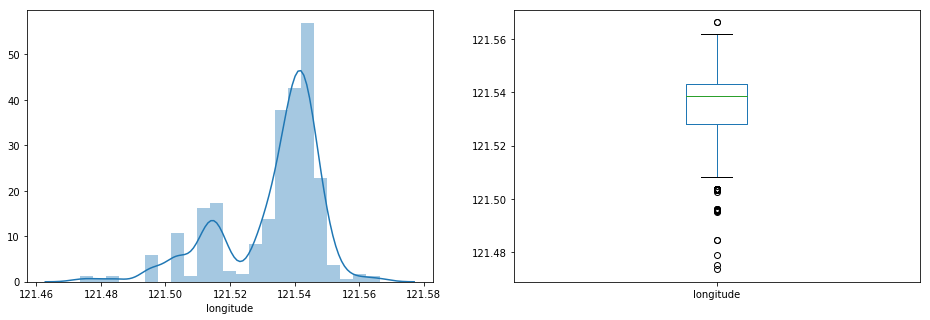

In [11]:
plt.figure(1)

plt.subplot(121)
sns.distplot(data['longitude'])

plt.subplot(122)
data['longitude'].plot.box(figsize=(16,5))

plt.show()

It seems that Longitude also has outliers. 

#### 6. Latitude

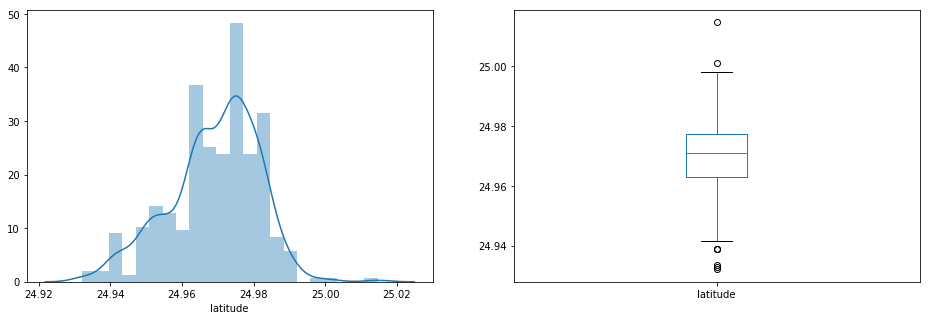

In [12]:
plt.figure(1)

plt.subplot(121)
sns.distplot(data['latitude'])

plt.subplot(122)
data['latitude'].plot.box(figsize=(16,5))

plt.show()

Latitude also has outliers

#### 7. House Price

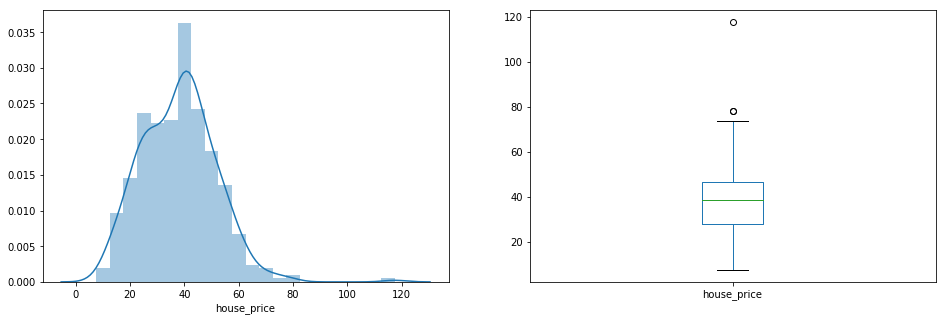

In [13]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['house_price'])

plt.subplot(122)
data['house_price'].plot.box(figsize=(16,5))

plt.show()

### 2. Bivariate analysis

Explore dataset each column with Target variable

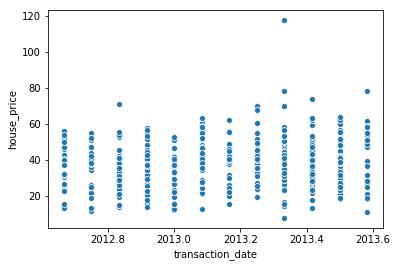

In [14]:
sns.scatterplot(x='transaction_date', y='house_price', data=data)

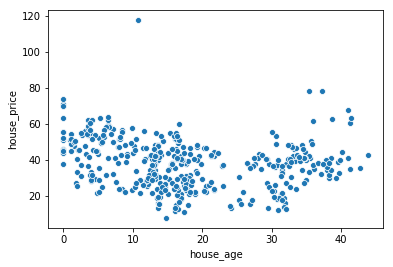

In [15]:
sns.scatterplot('house_age', 'house_price', data=data)

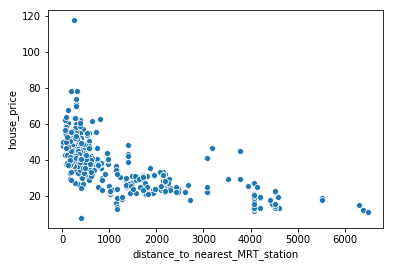

In [16]:
sns.scatterplot('distance_to_nearest_MRT_station', 'house_price', data=data)

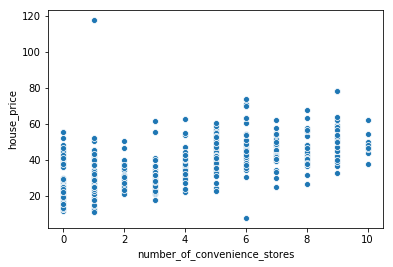

In [17]:
sns.scatterplot('number_of_convenience_stores','house_price', data=data)

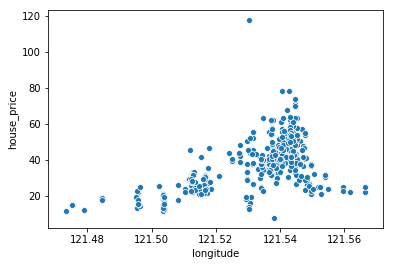

In [18]:
sns.scatterplot('longitude','house_price',data=data)

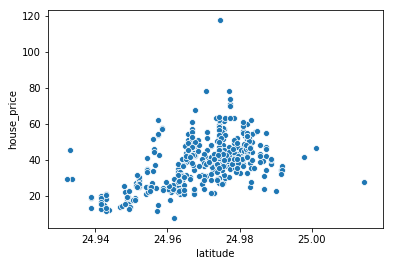

In [19]:
sns.scatterplot('latitude','house_price',data=data)

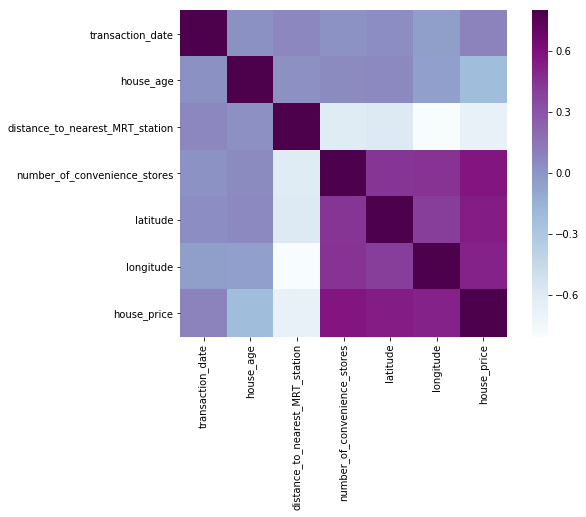

In [20]:
matrix = data.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

### 3. Missing value treatment

No missing values in the dataset

### Define LinearRegression function and model evaluation

In [40]:
def BuildAndEvaluateLinearRegression(data_in):
    X_in = data_in.drop('house_price', axis=1)
    Y_in = data_in['house_price']
    
    x_train, x_test, y_train, y_test = train_test_split(X_in, Y_in, test_size = 0.3)
    
    # Instance of LinearRegression model
    model = LinearRegression()
    
    # Train the model 
    model.fit(x_train, y_train)
    
    # Predict using model
    y_predict = model.predict(x_test)
    
    # Evaluate MAE
    mae = np.mean(np.abs(y_predict - y_test))
    print ("Mean Absolute Error: {0}".format(mae))
    
    # Evaluate MSE, R-Score
    mse = np.mean((y_predict - y_test)**2)
    print ("Mean Squared Error: {0}".format(mse))
    
    # Evaluate R-Score
    r_score = model.score(x_test, y_test)
    print ("R-Score: {0}".format(r_score))
    
    return model

## Model 1: Linear Regression model
Let's create first model without outlier treatment

In [24]:
BuildAndEvaluateLinearRegression(data)

Mean Absolute Error: 5.597098415975107
Mean Squared Error: 51.333030417068834
R-Score: 0.6687468125614806


### 4. Outlier treatment

Following features has outliers:
1. Distance to nearest MRT station
2. Longitude
3. Latitude

In [25]:
data['distance_to_nearest_MRT_station'].describe()

count     414.000000
mean     1083.885689
std      1262.109595
min        23.382840
25%       289.324800
50%       492.231300
75%      1454.279000
max      6488.021000
Name: distance_to_nearest_MRT_station, dtype: float64

In [26]:
data['distance_to_nearest_MRT_station'].quantile([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])

0.0      23.38284
0.1     157.60520
0.2     255.94448
0.3     329.97470
0.4     392.60884
0.5     492.23130
0.6     640.73910
0.7    1172.01060
0.8    1783.18000
0.9    2697.66270
1.0    6488.02100
Name: distance_to_nearest_MRT_station, dtype: float64

In [27]:
data_1 = data.loc[data['distance_to_nearest_MRT_station'] < 2697.6627]
data_1.head()

,transaction_date,house_age,distance_to_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [28]:
data_1.shape

(372, 7)

### Model 2: LinearRegression model after outlier treatment of distance to nearest MRT station

In [41]:
model_1 = BuildAndEvaluateLinearRegression(data_1)

Mean Absolute Error: 5.093002005741466
Mean Squared Error: 47.2671032959235
R-Score: 0.6671240585206324


Since, R-score is better after outlier treatment, we have better model.

### Model 3: LinearRegression model after removing 'Longitude' and 'Latitude' columns

In [34]:
data_2 = data_1.drop(['latitude', 'longitude'], axis=1)
data_2.head()

,transaction_date,house_age,distance_to_nearest_MRT_station,number_of_convenience_stores,house_price
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [42]:
model_2 = BuildAndEvaluateLinearRegression(data_2)

Mean Absolute Error: 5.600699006669155
Mean Squared Error: 52.31472380507405
R-Score: 0.6347926756179811


Since, R-score is not better, we shoud not remove 'Longitude' and 'Latitude' columns

### Model 4: LinearRegression model after outlier treatment to 'Longitude' and 'Latitude' columns

In [38]:
data_1['longitude'].describe()

count    372.000000
mean     121.536721
std        0.010829
min      121.508270
25%      121.533788
50%      121.539900
75%      121.543480
max      121.561740
Name: longitude, dtype: float64

No outliers left for 'Longitude' column in data_1

In [39]:
data_1['latitude'].describe()

count    372.000000
mean      24.971204
std        0.009673
min       24.948830
25%       24.964430
50%       24.972870
75%       24.978435
max       24.991760
Name: latitude, dtype: float64

No outliers left for 'Latitude' column in data_1

### Check coefficients of the linear equation

Index(['transaction_date', 'house_age', 'distance_to_nearest_MRT_station',
       'number_of_convenience_stores', 'latitude', 'longitude'],
      dtype='object')


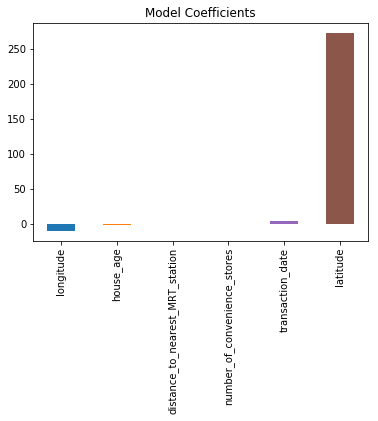

In [45]:
# Checking the coefficients of predictors
predictors = data_1.drop('house_price', axis=1).columns
print(predictors)
coef = Series(model_1.coef_, predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

Graph shows 'Latitude' column is the impacting factor to model prediction. 